In [3]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the csv file
df = pd.read_csv(".././docs/csv/results.csv")
df2 = pd.read_csv(".././docs/csv/results2.csv")

In [4]:
unique_df = {}

for value in df['label'].unique():
    # Filter the original DataFrame to get the rows with the current unique value
    new_df = df[df['label'] == value]
    
    # compute mean and standard deviation
    new_df = new_df.sort_values(by=['size'])
    new_df = new_df.groupby(['size']).agg({'time': ['mean', 'std']})
    new_df.columns = ['time', 'std']
    new_df = new_df.reset_index()
    
    # Store the new DataFrame in the dictionary with the unique value as the key
    unique_df[value] = new_df

# for unique combination of df['label'] and df['param']
for value in df2['label'].unique():
    # Filter the original DataFrame to get the rows with the current unique value
    new_df = df2[df2['label'] == value]
    
    # compute mean and standard deviation for each unique combination
    for param in new_df['param'].unique():
        new_df2 = new_df[new_df['param'] == param]
        new_df2 = new_df2.sort_values(by=['size'])
        new_df2 = new_df2.groupby(['size']).agg({'time': ['mean', 'std']})
        new_df2.columns = ['time', 'std']
        new_df2 = new_df2.reset_index()
    
        # Store the new DataFrame in the dictionary with the unique combination as the key
        unique_df[(value, param)] = new_df2

unique_df

{'python':    size           time       std
 0    32       0.005648  0.002063
 1    64       0.048004  0.006445
 2   128       0.366891  0.025504
 3   256       2.873940  0.025432
 4   512      24.524437  0.295540
 5  1024     221.705985  1.308298
 6  2048    2014.454849       NaN
 7  4096   18214.384031       NaN
 8  8192  164691.596770       NaN,
 'O0':    size         time       std
 0    32     0.000000  0.000000
 1    64     0.000800  0.000837
 2   128     0.006800  0.000837
 3   256     0.055600  0.003782
 4   512     0.415800  0.021123
 5  1024    22.786200  0.709160
 6  2048   178.711737       NaN
 7  4096  1336.480943       NaN
 8  8192  9994.762158       NaN,
 'O1':    size          time       std
 0    32      0.000000  0.000000
 1    64      0.000200  0.000447
 2   128      0.001800  0.000837
 3   256      0.033200  0.002168
 4   512      0.807200  0.004147
 5  1024     10.307400  0.119803
 6  2048    131.519438       NaN
 7  4096   1676.913472       NaN
 8  8192  21381.164

In [5]:
speedup_df = {}

for value in unique_df:
    df_speedup = unique_df[value].copy()
    df_speedup['speedup'] = unique_df['python']['time'] / unique_df[value]['time']
    df_speedup['std'] = df_speedup['speedup'] * np.sqrt((unique_df[value]['std'] / unique_df[value]['time'])**2 + (unique_df['python']['std'] / unique_df['python']['time'])**2)
    speedup_df[value] = df_speedup

In [6]:
def plot_df(label):
    plt.title(f'DGEMM Execution Time in {label}')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Time (Seconds)')
    plt.errorbar(unique_df[label]['size'], unique_df[label]['time'], yerr=unique_df[label]['std'], label=label)
    plt.show()

def plot_df2(label, param):
    plt.title(f'DGEMM Execution Time in {label} with {param}')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Time (Seconds)')
    plt.errorbar(unique_df[(label, param)]['size'], unique_df[(label, param)]['time'], yerr=unique_df[(label, param)]['std'], label=(label, param))
    plt.show()


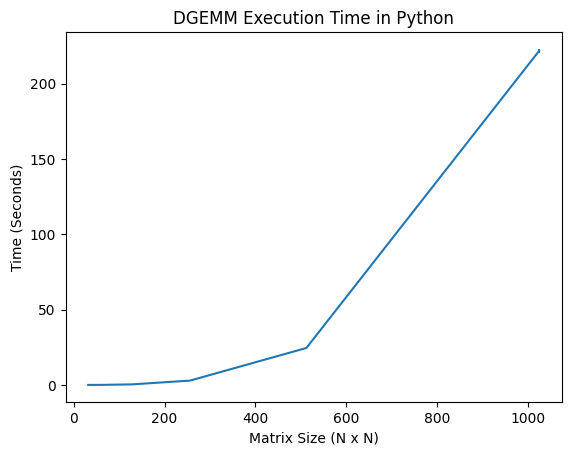

In [7]:
# plot unique_df[python][:6]

plt.title('DGEMM Execution Time in Python')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.errorbar(unique_df['python']['size'][:6], unique_df['python']['time'][:6], yerr=unique_df['python']['std'][:6], label='python')
plt.show()

In [8]:
unique_df['python']

,size,time,std
0,32,0.005648,0.002063
1,64,0.048004,0.006445
2,128,0.366891,0.025504
3,256,2.873940,0.025432
4,512,24.524437,0.295540
5,1024,221.705985,1.308298
6,2048,2014.454849,NaN
7,4096,18214.384031,NaN
8,8192,164691.596770,NaN


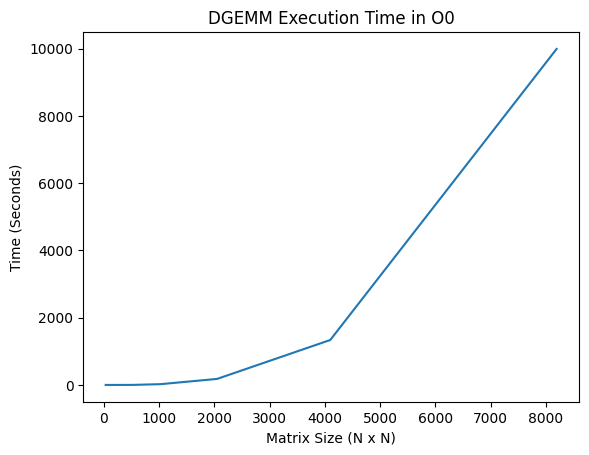

In [9]:
plot_df('O0')

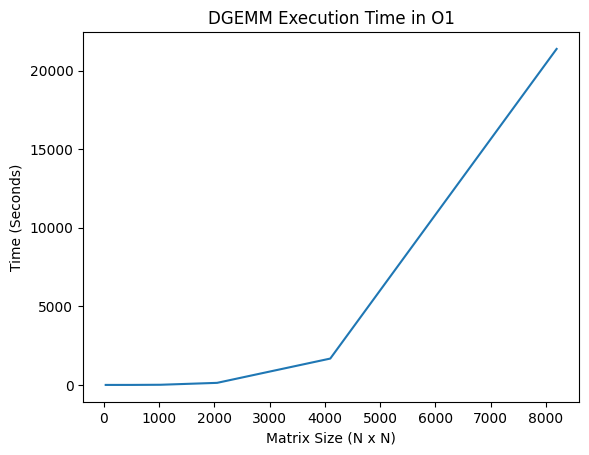

In [10]:
plot_df('O1')

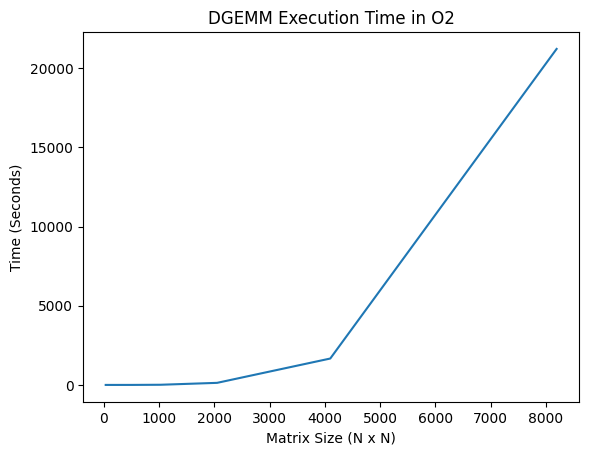

In [11]:
plot_df('O2')

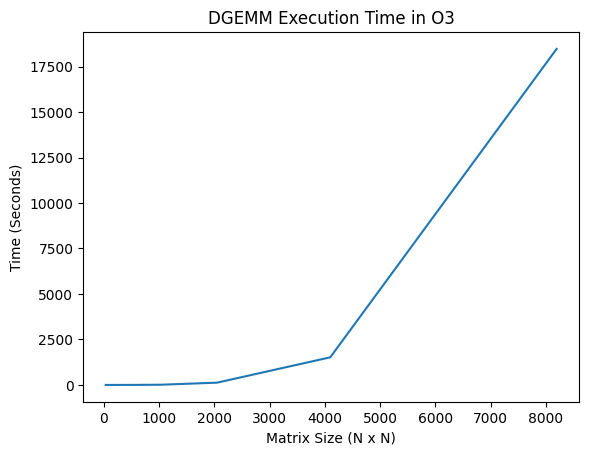

In [12]:
plot_df('O3')

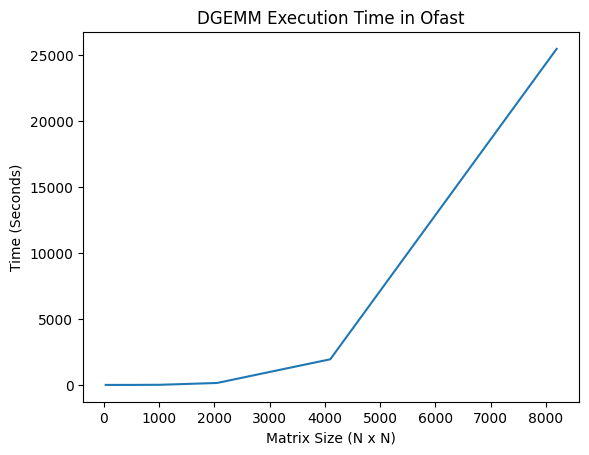

In [13]:
plot_df('Ofast')

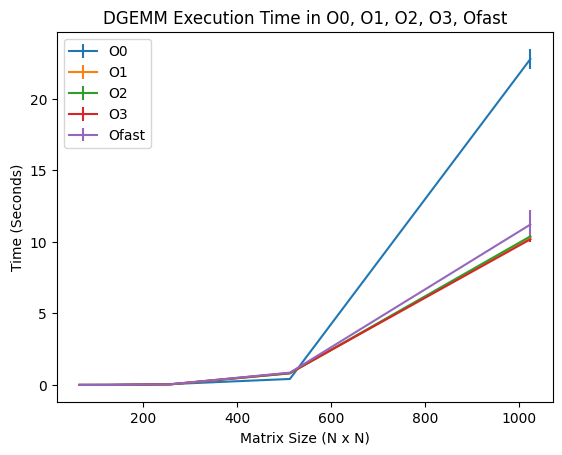

In [14]:
# plot O graphs together

plt.title('DGEMM Execution Time in O0, O1, O2, O3, Ofast')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
# plot only till 1024 [1:6]
plt.errorbar(unique_df['O0']['size'][1:6], unique_df['O0']['time'][1:6], yerr=unique_df['O0']['std'][1:6], label='O0')
plt.errorbar(unique_df['O1']['size'][1:6], unique_df['O1']['time'][1:6], yerr=unique_df['O1']['std'][1:6], label='O1')
plt.errorbar(unique_df['O2']['size'][1:6], unique_df['O2']['time'][1:6], yerr=unique_df['O2']['std'][1:6], label='O2')
plt.errorbar(unique_df['O3']['size'][1:6], unique_df['O3']['time'][1:6], yerr=unique_df['O3']['std'][1:6], label='O3')
plt.errorbar(unique_df['Ofast']['size'][1:6], unique_df['Ofast']['time'][1:6], yerr=unique_df['Ofast']['std'][1:6], label='Ofast')
plt.legend()
plt.show()

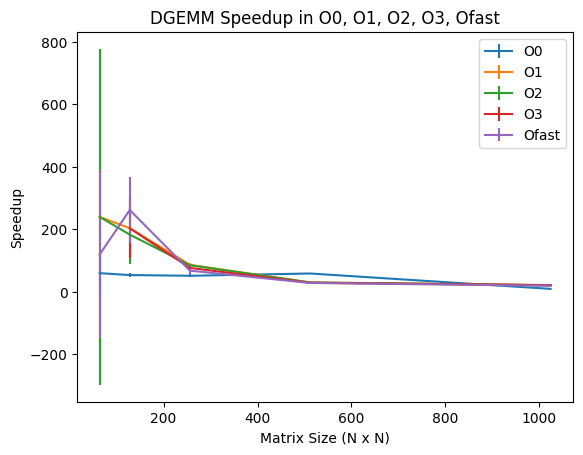

In [15]:
# plot speedup graphs together

plt.title('DGEMM Speedup in O0, O1, O2, O3, Ofast')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
# plot only till size = 1024
plt.errorbar(unique_df['O0']['size'][1:6], speedup_df['O0']['speedup'][1:6], yerr=speedup_df['O0']['std'][1:6], label='O0')
plt.errorbar(unique_df['O1']['size'][1:6], speedup_df['O1']['speedup'][1:6], yerr=speedup_df['O1']['std'][1:6], label='O1')
plt.errorbar(unique_df['O2']['size'][1:6], speedup_df['O2']['speedup'][1:6], yerr=speedup_df['O2']['std'][1:6], label='O2')
plt.errorbar(unique_df['O3']['size'][1:6], speedup_df['O3']['speedup'][1:6], yerr=speedup_df['O3']['std'][1:6], label='O3')
plt.errorbar(unique_df['Ofast']['size'][1:6], speedup_df['Ofast']['speedup'][1:6], yerr=speedup_df['Ofast']['std'][1:6], label='Ofast')
plt.legend()
plt.show()

In [16]:
speedup_df['Ofast']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000400,268.832058,120.009238
2,128,0.001400,104.133784,262.065352
3,256,0.042200,13.438259,68.102842
4,512,0.855800,0.552315,28.656739
5,1024,11.214800,1.825751,19.769054
6,2048,148.329424,NaN,13.580952
7,4096,1943.777549,NaN,9.370611
8,8192,25472.162249,NaN,6.465552


In [17]:
speedup_df['O1']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000200,537.664115,240.018476
2,128,0.001800,95.795455,203.828607
3,256,0.033200,5.704297,86.564456
4,512,0.807200,0.398018,30.382108
5,1024,10.307400,0.280380,21.509400
6,2048,131.519438,NaN,15.316784
7,4096,1676.913472,NaN,10.861851
8,8192,21381.164970,NaN,7.702648


In [18]:
speedup_df['O2']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000200,537.664115,240.018476
2,128,0.002000,92.605080,183.445746
3,256,0.033600,2.999560,85.533926
4,512,0.810600,0.432412,30.254672
5,1024,10.390800,0.264848,21.336758
6,2048,130.942817,NaN,15.384233
7,4096,1666.927988,NaN,10.926917
8,8192,21220.323366,NaN,7.761031


In [19]:
speedup_df['O3']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000000,NaN,inf
2,128,0.001800,95.795455,203.828607
3,256,0.037400,1.959494,76.843314
4,512,0.836800,0.362943,29.307406
5,1024,10.182000,0.385060,21.774306
6,2048,124.744101,NaN,16.148698
7,4096,1517.859034,NaN,12.000050
8,8192,18468.977876,NaN,8.917201


In [20]:
speedup_df['Ofast']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000400,268.832058,120.009238
2,128,0.001400,104.133784,262.065352
3,256,0.042200,13.438259,68.102842
4,512,0.855800,0.552315,28.656739
5,1024,11.214800,1.825751,19.769054
6,2048,148.329424,NaN,13.580952
7,4096,1943.777549,NaN,9.370611
8,8192,25472.162249,NaN,6.465552


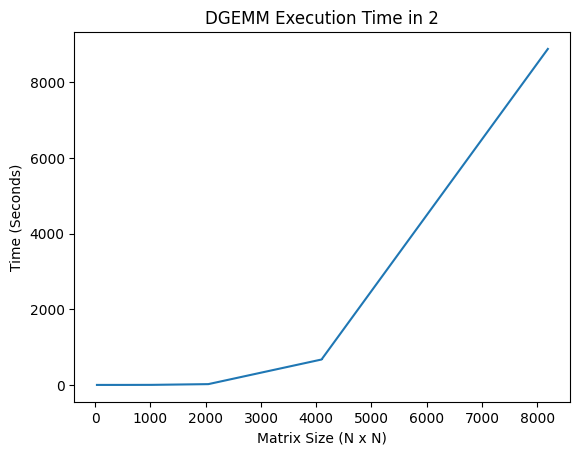

In [21]:
plot_df('2')

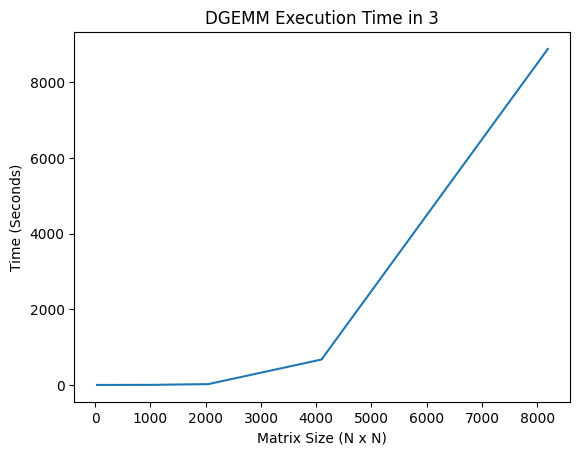

In [22]:
plot_df('3')

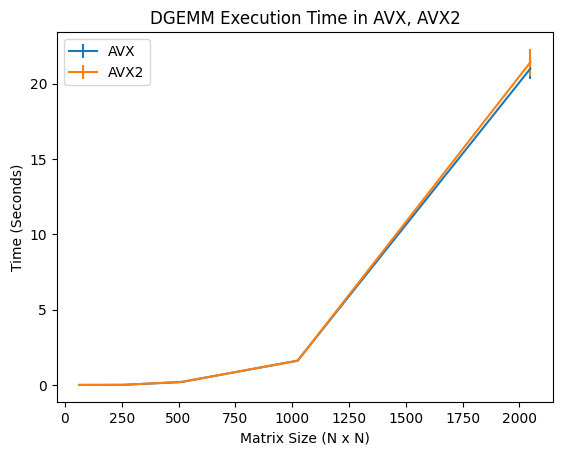

In [23]:
# plot 2 graphs together

plt.title('DGEMM Execution Time in AVX, AVX2')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.errorbar(unique_df['2']['size'][1:7], unique_df['2']['time'][1:7], yerr=unique_df['2']['std'][1:7], label='AVX')
plt.errorbar(unique_df['3']['size'][1:7], unique_df['3']['time'][1:7], yerr=unique_df['3']['std'][1:7], label='AVX2')
plt.legend()
plt.show()

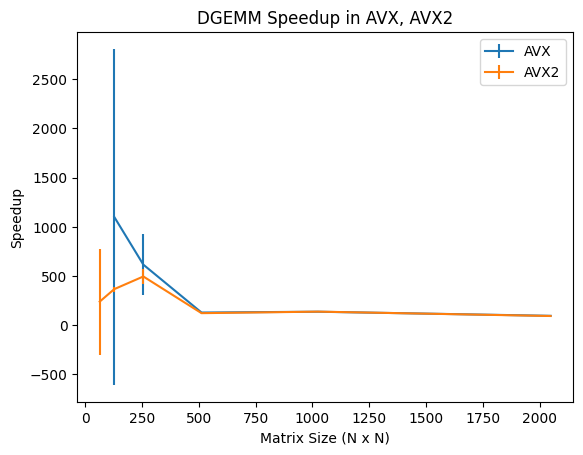

In [24]:
# plot speedup graphs together

plt.title('DGEMM Speedup in AVX, AVX2')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
plt.errorbar(speedup_df['2']['size'][1:7], speedup_df['2']['speedup'][1:7], yerr=speedup_df['2']['std'][1:7], label='AVX')
plt.errorbar(speedup_df['3']['size'][1:7], speedup_df['3']['speedup'][1:7], yerr=speedup_df['3']['std'][1:7], label='AVX2')
plt.legend()
plt.show()

In [47]:
speedup_df['2']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000000,NaN,inf
2,128,0.000333,1706.873307,1100.674477
3,256,0.004667,308.598031,615.844270
4,512,0.189833,4.898003,129.189310
5,1024,1.611667,1.838429,137.563176
6,2048,20.996636,NaN,95.941789
7,4096,671.359833,NaN,27.130584
8,8192,8877.037799,NaN,18.552540


In [26]:
speedup_df['3']

,size,time,std,speedup
0,32,0.000000,NaN,inf
1,64,0.000200,537.664115,240.018476
2,128,0.001000,25.504149,366.891492
3,256,0.005800,71.612093,495.506884
4,512,0.199600,12.056165,122.867923
5,1024,1.602200,3.335001,138.375974
6,2048,21.419500,NaN,94.047706
7,4096,671.241200,NaN,27.135379
8,8192,8877.037799,NaN,18.552540


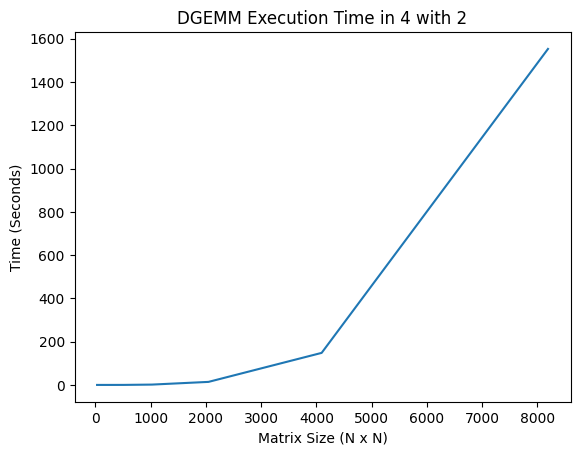

In [27]:
plot_df2(4, 2)

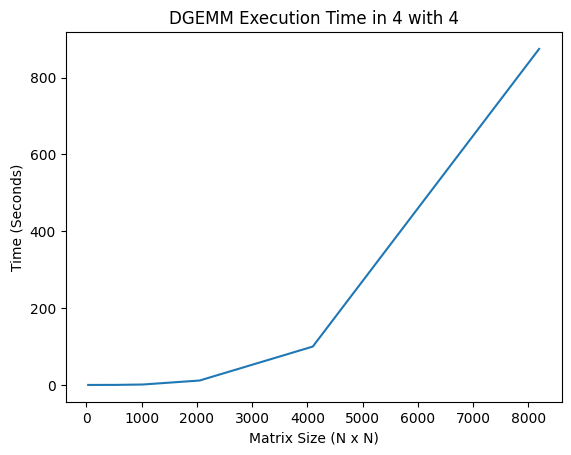

In [28]:
plot_df2(4, 4)

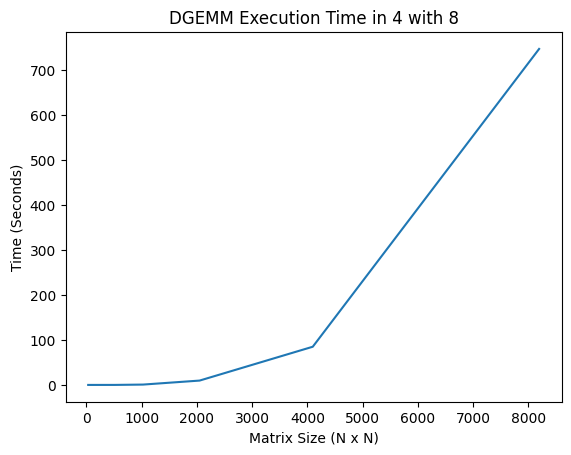

In [29]:
plot_df2(4, 8)

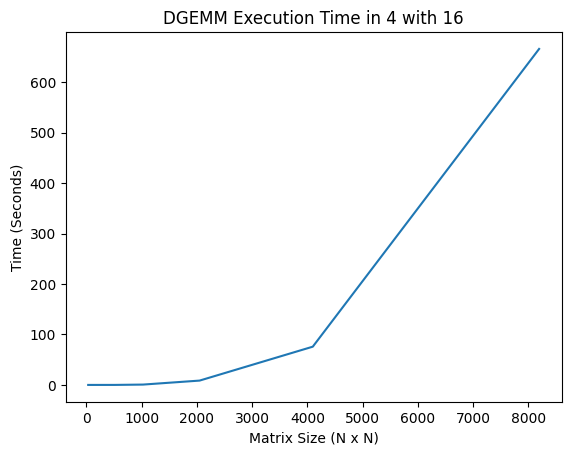

In [30]:
plot_df2(4, 16)

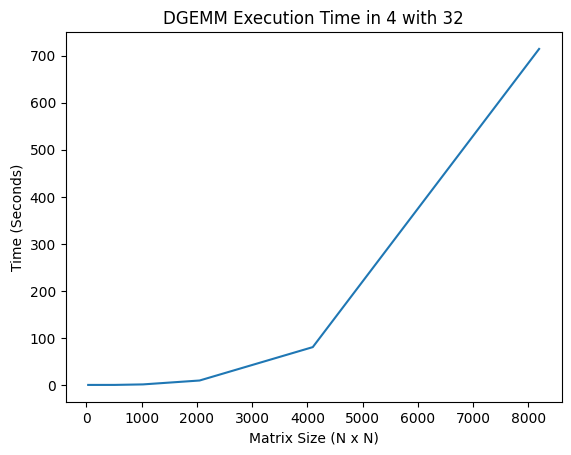

In [31]:
plot_df2(4, 32)

In [55]:
speedup_df[(4, 32)]

,size,time,std,speedup
0,32,0.0000,NaN,inf
1,64,0.0000,NaN,inf
2,128,0.0006,559.823718,611.485821
3,256,0.0038,166.651799,756.299981
4,512,0.0350,65.419294,700.698212
5,1024,1.1132,2.875658,199.160964
6,2048,9.3906,NaN,214.518226
7,4096,80.3860,NaN,226.586520
8,8192,714.4380,NaN,230.519089


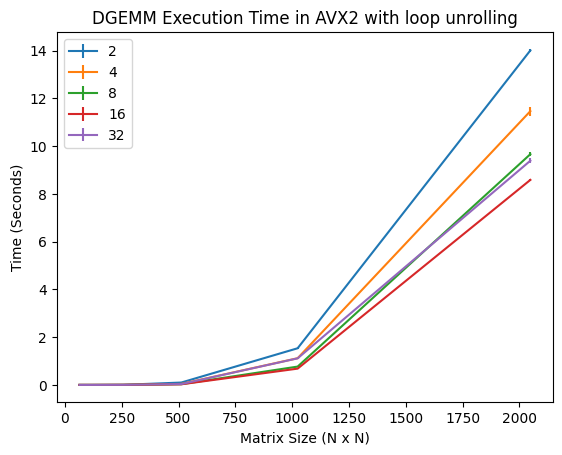

In [48]:
# plot 5 graphs together

plt.title('DGEMM Execution Time in AVX2 with loop unrolling')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.errorbar(unique_df[(4, 2)]['size'][1:7], unique_df[(4, 2)]['time'][1:7], yerr=unique_df[(4, 2)]['std'][1:7], label='2')
plt.errorbar(unique_df[(4, 4)]['size'][1:7], unique_df[(4, 4)]['time'][1:7], yerr=unique_df[(4, 4)]['std'][1:7], label='4')
plt.errorbar(unique_df[(4, 8)]['size'][1:7], unique_df[(4, 8)]['time'][1:7], yerr=unique_df[(4, 8)]['std'][1:7], label='8')
plt.errorbar(unique_df[(4, 16)]['size'][1:7], unique_df[(4, 16)]['time'][1:7], yerr=unique_df[(4, 16)]['std'][1:7], label='16')
plt.errorbar(unique_df[(4, 32)]['size'][1:7], unique_df[(4, 32)]['time'][1:7], yerr=unique_df[(4, 32)]['std'][1:7], label='32')
plt.legend()
plt.show()

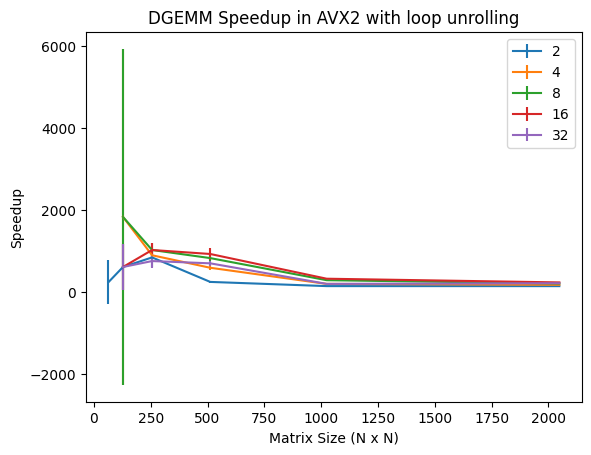

In [49]:
# plot speedup graphs together

plt.title('DGEMM Speedup in AVX2 with loop unrolling')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
plt.errorbar(speedup_df[(4, 2)]['size'][1:7], speedup_df[(4, 2)]['speedup'][1:7], yerr=speedup_df[(4, 2)]['std'][1:7], label='2')
plt.errorbar(speedup_df[(4, 4)]['size'][1:7], speedup_df[(4, 4)]['speedup'][1:7], yerr=speedup_df[(4, 4)]['std'][1:7], label='4')
plt.errorbar(speedup_df[(4, 8)]['size'][1:7], speedup_df[(4, 8)]['speedup'][1:7], yerr=speedup_df[(4, 8)]['std'][1:7], label='8')
plt.errorbar(speedup_df[(4, 16)]['size'][1:7], speedup_df[(4, 16)]['speedup'][1:7], yerr=speedup_df[(4, 16)]['std'][1:7], label='16')
plt.errorbar(speedup_df[(4, 32)]['size'][1:7], speedup_df[(4, 32)]['speedup'][1:7], yerr=speedup_df[(4, 32)]['std'][1:7], label='32')
plt.legend()
plt.show()

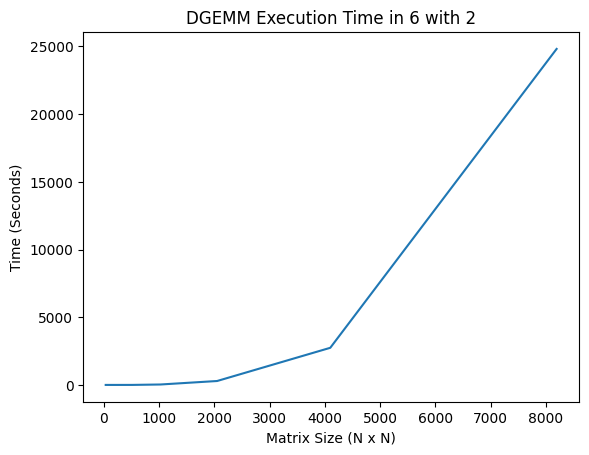

In [35]:
plot_df2(6, 2)

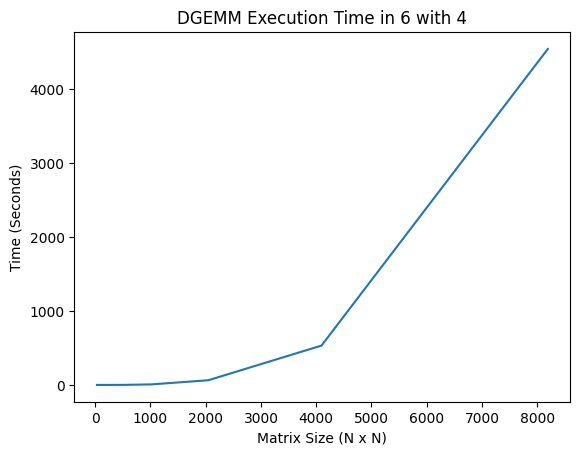

In [36]:
plot_df2(6, 4)

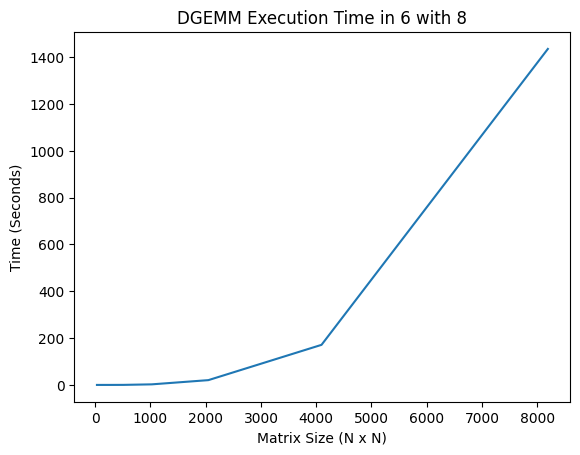

In [37]:
plot_df2(6, 8)

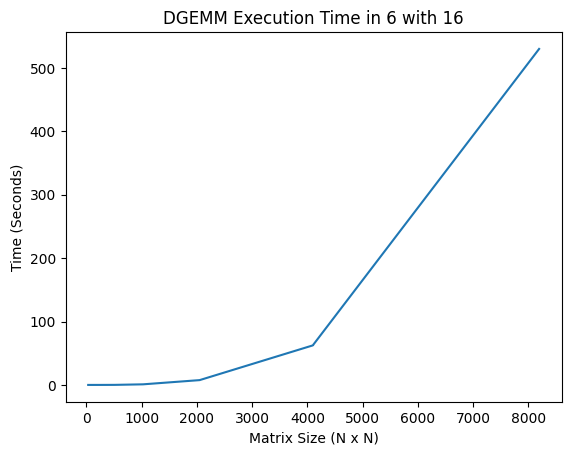

In [38]:
plot_df2(6, 16)

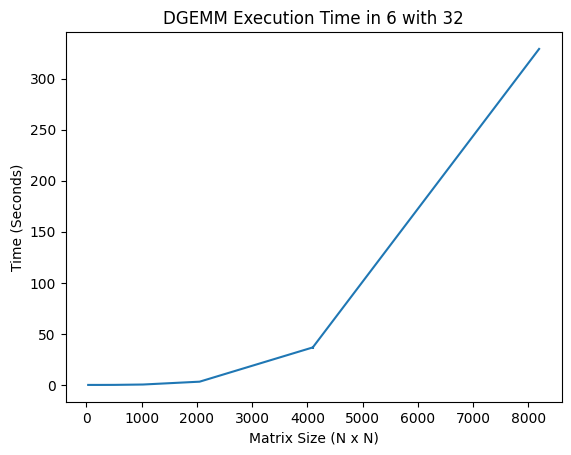

In [39]:
plot_df2(6, 32)

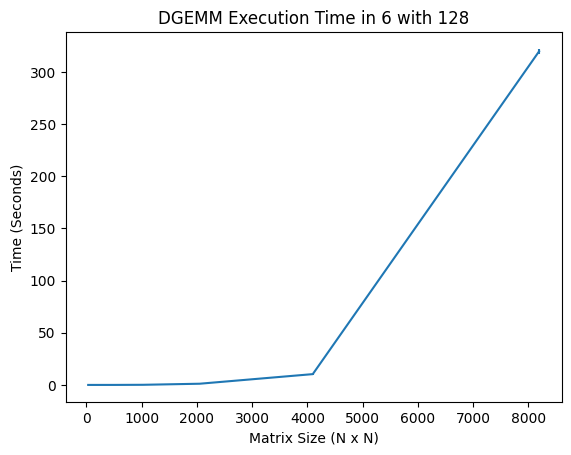

In [40]:
plot_df2(6, 128)

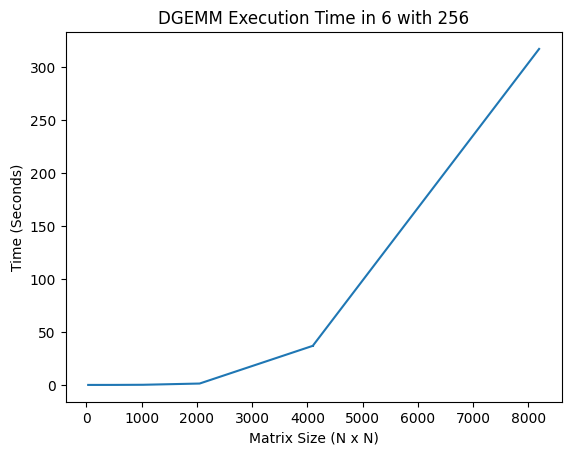

In [41]:
plot_df2(6, 256)

In [80]:
speedup_df["python"]

,size,time,std,speedup
0,32,0.005648,0.516647,1.0
1,64,0.048004,0.189864,1.0
2,128,0.366891,0.098308,1.0
3,256,2.873940,0.012515,1.0
4,512,24.524437,0.017042,1.0
5,1024,221.705985,0.008345,1.0
6,2048,2014.454849,NaN,1.0
7,4096,18214.384031,NaN,1.0
8,8192,164691.596770,NaN,1.0


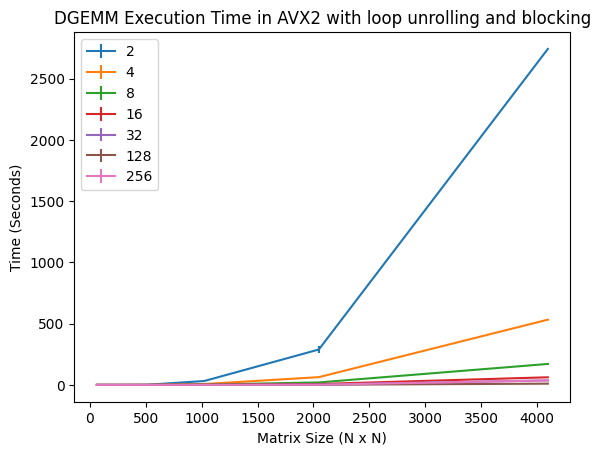

In [59]:
# plot 7 graphs together [1:8]

plt.title('DGEMM Execution Time in AVX2 with loop unrolling and blocking')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.errorbar(unique_df[(6, 2)]['size'][1:8], unique_df[(6, 2)]['time'][1:8], yerr=unique_df[(6, 2)]['std'][1:8], label='2')
plt.errorbar(unique_df[(6, 4)]['size'][1:8], unique_df[(6, 4)]['time'][1:8], yerr=unique_df[(6, 4)]['std'][1:8], label='4')
plt.errorbar(unique_df[(6, 8)]['size'][1:8], unique_df[(6, 8)]['time'][1:8], yerr=unique_df[(6, 8)]['std'][1:8], label='8')
plt.errorbar(unique_df[(6, 16)]['size'][1:8], unique_df[(6, 16)]['time'][1:8], yerr=unique_df[(6, 16)]['std'][1:8], label='16')
plt.errorbar(unique_df[(6, 32)]['size'][1:8], unique_df[(6, 32)]['time'][1:8], yerr=unique_df[(6, 32)]['std'][1:8], label='32')
plt.errorbar(unique_df[(6, 128)]['size'][1:8], unique_df[(6, 128)]['time'][1:8], yerr=unique_df[(6, 128)]['std'][1:8], label='128')
plt.errorbar(unique_df[(6, 256)]['size'][1:8], unique_df[(6, 256)]['time'][1:8], yerr=unique_df[(6, 256)]['std'][1:8], label='256')
plt.legend()
plt.show()

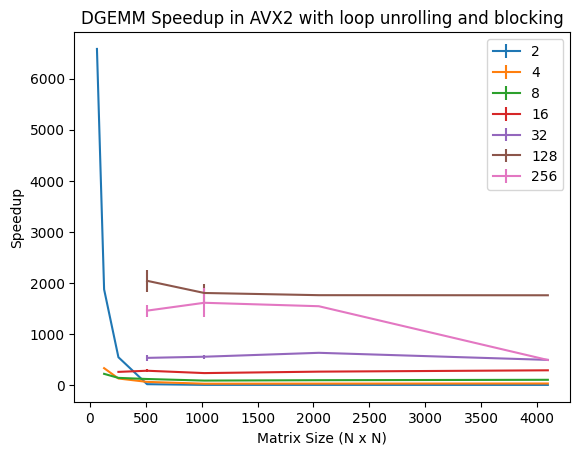

In [60]:
# plot speedup graphs together

plt.title('DGEMM Speedup in AVX2 with loop unrolling and blocking')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
plt.errorbar(speedup_df[(6, 2)]['size'][1:8], speedup_df[(6, 2)]['speedup'][1:8], yerr=speedup_df[(6, 2)]['std'][1:8], label='2')
plt.errorbar(speedup_df[(6, 4)]['size'][1:8], speedup_df[(6, 4)]['speedup'][1:8], yerr=speedup_df[(6, 4)]['std'][1:8], label='4')
plt.errorbar(speedup_df[(6, 8)]['size'][1:8], speedup_df[(6, 8)]['speedup'][1:8], yerr=speedup_df[(6, 8)]['std'][1:8], label='8')
plt.errorbar(speedup_df[(6, 16)]['size'][1:8], speedup_df[(6, 16)]['speedup'][1:8], yerr=speedup_df[(6, 16)]['std'][1:8], label='16')
plt.errorbar(speedup_df[(6, 32)]['size'][1:8], speedup_df[(6, 32)]['speedup'][1:8], yerr=speedup_df[(6, 32)]['std'][1:8], label='32')
plt.errorbar(speedup_df[(6, 128)]['size'][1:8], speedup_df[(6, 128)]['speedup'][1:8], yerr=speedup_df[(6, 128)]['std'][1:8], label='128')
plt.errorbar(speedup_df[(6, 256)]['size'][1:8], speedup_df[(6, 256)]['speedup'][1:8], yerr=speedup_df[(6, 256)]['std'][1:8], label='256')
plt.legend()
plt.show()

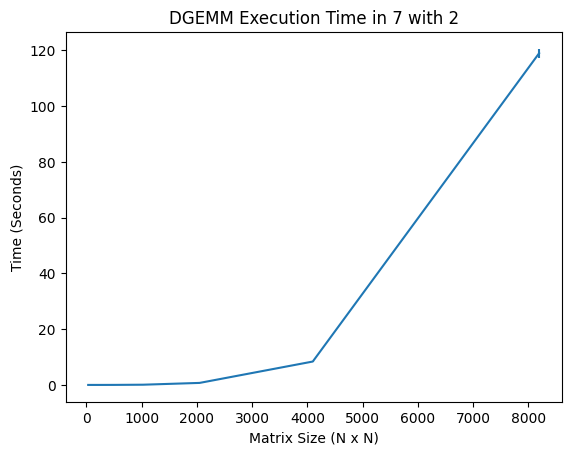

In [42]:
plot_df2(7, 2)

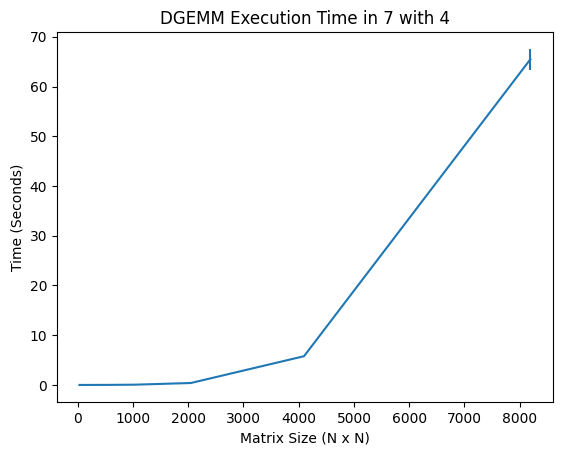

In [43]:
plot_df2(7, 4)

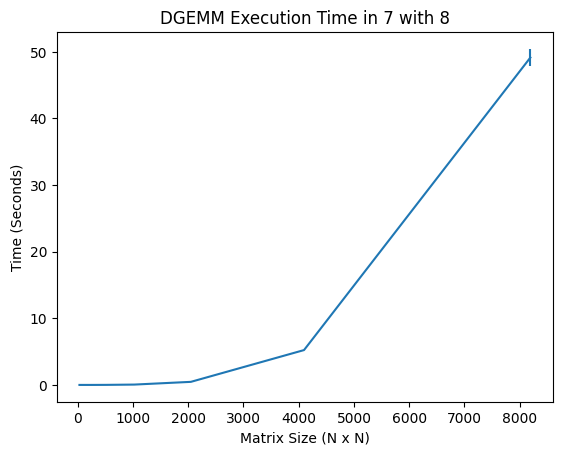

In [44]:
plot_df2(7, 8)

In [75]:
speedup_df[(7, 8)]

,size,time,std,speedup
0,32,0.0000,NaN,inf
1,64,0.0000,NaN,inf
2,128,0.0000,NaN,inf
3,256,0.0000,NaN,inf
4,512,0.0076,485.668748,3226.899659
5,1024,0.0516,361.930530,4296.627614
6,2048,0.4604,NaN,4375.444936
7,4096,5.2300,NaN,3482.673811
8,8192,49.1352,NaN,3351.804750


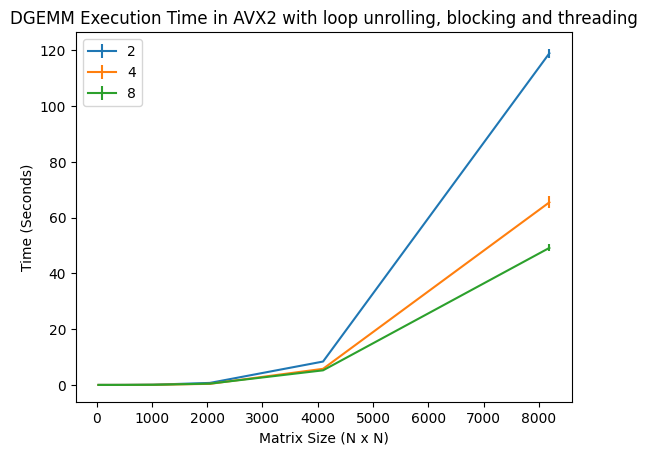

In [70]:
# plot 3 graphs together

plt.title('DGEMM Execution Time in AVX2 with loop unrolling, blocking and threading')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (Seconds)')
plt.errorbar(unique_df[(7, 2)]['size'], unique_df[(7, 2)]['time'], yerr=unique_df[(7, 2)]['std'], label='2')
plt.errorbar(unique_df[(7, 4)]['size'], unique_df[(7, 4)]['time'], yerr=unique_df[(7, 4)]['std'], label='4')
plt.errorbar(unique_df[(7, 8)]['size'], unique_df[(7, 8)]['time'], yerr=unique_df[(7, 8)]['std'], label='8')
plt.legend()
plt.show()

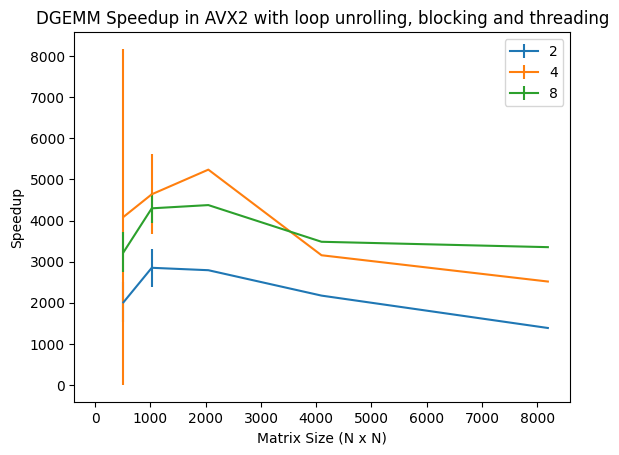

In [71]:
# plot speedup graphs together

plt.title('DGEMM Speedup in AVX2 with loop unrolling, blocking and threading')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
plt.errorbar(speedup_df[(7, 2)]['size'], speedup_df[(7, 2)]['speedup'], yerr=speedup_df[(7, 2)]['std'], label='2')
plt.errorbar(speedup_df[(7, 4)]['size'], speedup_df[(7, 4)]['speedup'], yerr=speedup_df[(7, 4)]['std'], label='4')
plt.errorbar(speedup_df[(7, 8)]['size'], speedup_df[(7, 8)]['speedup'], yerr=speedup_df[(7, 8)]['std'], label='8')
plt.legend()
plt.show()

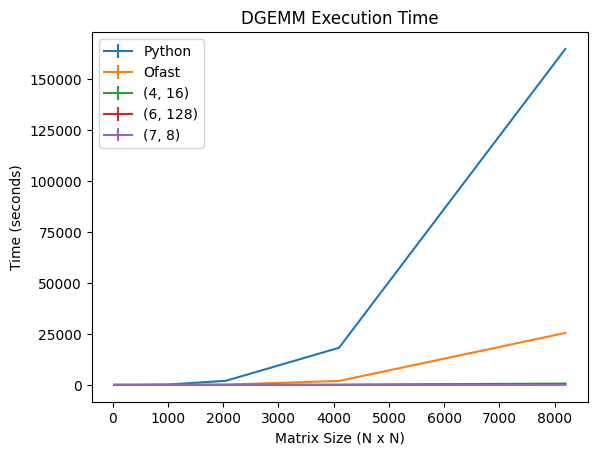

In [45]:
# plot the graphs together

plt.title('DGEMM Execution Time')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.errorbar(unique_df['python']['size'], unique_df['python']['time'], yerr=unique_df['python']['std'], label='Python')
plt.errorbar(unique_df['Ofast']['size'], unique_df['Ofast']['time'], yerr=unique_df['Ofast']['std'], label='Ofast')
plt.errorbar(unique_df[(4, 16)]['size'], unique_df[(4, 16)]['time'], yerr=unique_df[(4, 16)]['std'], label=(4, 16))
plt.errorbar(unique_df[(6, 128)]['size'], unique_df[(6, 128)]['time'], yerr=unique_df[(6, 128)]['std'], label=(6, 128))
plt.errorbar(unique_df[(7, 8)]['size'], unique_df[(7, 8)]['time'], yerr=unique_df[(7, 8)]['std'], label=(7, 8))
plt.legend()
plt.show()

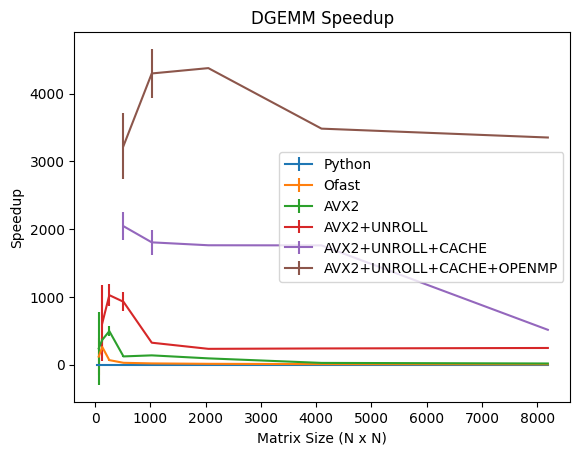

In [46]:
# plot the speedup graphs together

plt.title('DGEMM Speedup')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
plt.errorbar(speedup_df['python']['size'], speedup_df['python']['speedup'], yerr=speedup_df['python']['std'], label='Python')
plt.errorbar(speedup_df['Ofast']['size'], speedup_df['Ofast']['speedup'], yerr=speedup_df['Ofast']['std'], label='Ofast')
plt.errorbar(speedup_df['3']['size'], speedup_df['3']['speedup'], yerr=speedup_df['3']['std'], label='AVX2')
plt.errorbar(speedup_df[(4, 16)]['size'], speedup_df[(4, 16)]['speedup'], yerr=speedup_df[(4, 16)]['std'], label='AVX2+UNROLL')
plt.errorbar(speedup_df[(6, 128)]['size'], speedup_df[(6, 128)]['speedup'], yerr=speedup_df[(6, 128)]['std'], label='AVX2+UNROLL+CACHE')
plt.errorbar(speedup_df[(7, 8)]['size'], speedup_df[(7, 8)]['speedup'], yerr=speedup_df[(7, 8)]['std'], label='AVX2+UNROLL+CACHE+OPENMP')
plt.legend()
plt.show()